###Q1: Undestanding the data and preprocessing

Import the required libraries:

Define the following:

1. maximum features = 10000
2. maximum Length of input text to be read = 50
3. Load imdb data (list of integers into x_train, y_train, x_test, y_test)
4. DIsplay the following: 
 * Number of reviews, Length of first and second reviews, First review, it's label
5. Preprocess data: If we were training our RNN one sentence at a time, it would be okay to have sentences of varying lengths. However, as with any neural network, it can be sometimes be advantageous to train inputs in batches. When doing so with RNNs, our input tensors need to be of the same length/dimensions. Thus, let's pad our sentences.
 * Change the x_train and y_train integer lists into 2D integer tensors to match the maximum size of input text by padding 0's.



In [81]:
# importing libraries

import numpy as np

import tensorflow as tf
import tensorflow

import matplotlib.pyplot as plt

from tensorflow.keras.utils import plot_model
import matplotlib.image as mpimg


###


# MLP for the IMDB problem
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

from keras.layers import LSTM, Dropout, GRU, Bidirectional

In [69]:
def data_handler2():

  # load the dataset with just the top 10000 words

  top_words = 10000

  (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = top_words)

  print("X_train: {}\ny_train: {}\nX_test: {}\ny_test: {}".format(
      X_train.shape, y_train.shape, X_test.shape, y_test.shape
  ))

  print("Classes: ")
  print(np.unique(y_test))

  print("Length of first review: {}, label: {}".format(len(X_train[0]), y_train[0]))
  print("Length of second review: {}, label: {}".format(len(X_train[1]), y_train[1]))



  # truncate or pad the reviews to 50 chars
  max_words = 50
  X_train = sequence.pad_sequences(X_train, maxlen=max_words)
  X_test = sequence.pad_sequences(X_test, maxlen=max_words) 

  return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = data_handler2()

X_train: (25000,)
y_train: (25000,)
X_test: (25000,)
y_test: (25000,)
Classes: 
[0 1]
Length of first review: 218, label: 1
Length of second review: 189, label: 0


###Q2: Model 1: Feed-Forward Networks with Embeddings using IMDB data.

Define the model:
4. Initialize a Sequential model
5. Define an Embedding layer by passing the arguments of a vocabulary(maximum features of 10000 (e.g. integer encoded words from 0 to 9999, inclusive), a vector space of 32 dimensions each (embedding dimension), one for each input word)
6. How will you compute the dimension of the output from the embedding layer?\
**ANS:** The dimension of output from the embedding layer is calculated as follows: It has the shape (max length of input strings, size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word). Therefore for our example it is (50, 32). The number of parameters is simply a multiplication of the vocab size which is 10000 and the output vector space size which is 32, hence 320000.
7. Add the layer to flatten the output into a one vector on to the Dense output layer with the 'sigmoid' activation function. How will you compute the size of the output vector?
**ANS:** The size of the output vector for the flatten layer is simply a product of the output shape dimensions of the layer before it. Therefore in this case its 50 * 32 = 1600 from the embedding layer preceding it. The number of parameters for the layer after the flatten layer is (flatten layer output shape * number of vectors in layer after flatten) + number of vectors in layer after flatten.
(1600 * 250) + 250 = 400250.
8. Compile the model using 'binary_crossentropy' loss, 'adam' optimizer and 'accuracy' metric and finally display the model summary.

In [72]:
from tensorflow.keras.optimizers import Adam

def model_creator():

  model = Sequential()
  model.add(Embedding(10000, 32, input_length=50))
  model.add(Flatten())
  model.add(Dense(250, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.summary())

  return model

In [73]:
model = model_creator()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 32)            320000    
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 250)               400250    
                                                                 
 dense_7 (Dense)             (None, 1)                 251       
                                                                 
Total params: 720,501
Trainable params: 720,501
Non-trainable params: 0
_________________________________________________________________
None


###Q3: Training and Evaluation of the model 
Fit and Evaluate the model
9. Fit and evaluate the model's prediction loss and accuracy on the test dataa nd plot the training and validation loss vs. accuracy. Hint: storing results of fit function into history will be helpful. Write your observation.
10. Visualize the Model’s Structure using plot_model, Image and store the convnet model into a '.png' file for future reference or documentaion purposes.


In [76]:
def model_fitter(model, X_train, y_train, X_test, y_test, epochs):

  # Fit the model
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128, verbose=2)
  # Final evaluation of the model
  scores = model.evaluate(X_test, y_test, verbose=0)
  print("Accuracy: %.2f%%" % (scores[1]*100))

  visualizer(history, model)

def visualizer(history, model):

  plt.figure(figsize = (8, 6), dpi=80)
  plot_model(model, to_file = 'model.png', show_shapes=True)
  img = mpimg.imread('/content/model.png')
  plt.imshow(img)
  plt.show()

  fig, ax = plt.subplots(1,2)
  ax[0].plot(history.history['loss'], color='b', label="Training Loss")
  ax[0].plot(history.history['val_loss'], color='r', label="Test Loss")
  legend = ax[0].legend(loc='best', shadow=True)

  ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
  ax[1].plot(history.history['val_accuracy'], color='r', label="Test Accuracy")
  legend = ax[1].legend(loc='best', shadow=True)  


Epoch 1/30
196/196 - 4s - loss: 4.5637e-05 - accuracy: 1.0000 - val_loss: 1.1261 - val_accuracy: 0.7911 - 4s/epoch - 18ms/step
Epoch 2/30
196/196 - 4s - loss: 3.9110e-05 - accuracy: 1.0000 - val_loss: 1.1401 - val_accuracy: 0.7912 - 4s/epoch - 18ms/step
Epoch 3/30
196/196 - 4s - loss: 3.3659e-05 - accuracy: 1.0000 - val_loss: 1.1539 - val_accuracy: 0.7914 - 4s/epoch - 18ms/step
Epoch 4/30
196/196 - 4s - loss: 2.9097e-05 - accuracy: 1.0000 - val_loss: 1.1673 - val_accuracy: 0.7912 - 4s/epoch - 18ms/step
Epoch 5/30
196/196 - 4s - loss: 2.5244e-05 - accuracy: 1.0000 - val_loss: 1.1804 - val_accuracy: 0.7914 - 4s/epoch - 18ms/step
Epoch 6/30
196/196 - 3s - loss: 2.1980e-05 - accuracy: 1.0000 - val_loss: 1.1933 - val_accuracy: 0.7914 - 3s/epoch - 18ms/step
Epoch 7/30
196/196 - 4s - loss: 1.9203e-05 - accuracy: 1.0000 - val_loss: 1.2057 - val_accuracy: 0.7911 - 4s/epoch - 18ms/step
Epoch 8/30
196/196 - 4s - loss: 1.6817e-05 - accuracy: 1.0000 - val_loss: 1.2180 - val_accuracy: 0.7909 - 4s/ep

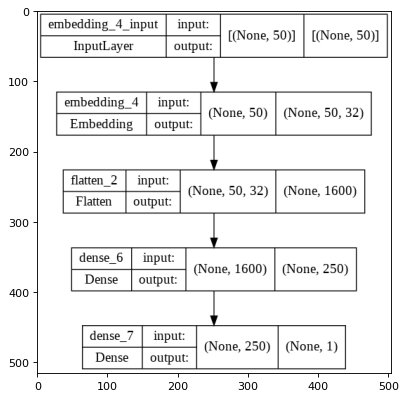

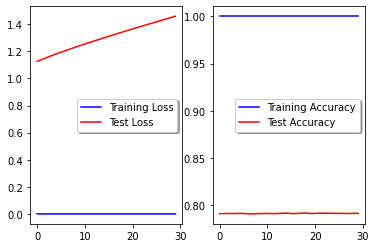

In [77]:
model_fitter(model, X_train, y_train, X_test, y_test, epochs = 30)

### Q4: MODEL 2 : CONVOLUTIONAL NEURAL NETWORKS (CNN) with embeddings

Text can be thought of as 1-dimensional sequence (a single, long vector) and we can apply 1D Convolutions over a set of word embeddings\
Now, inlude your code to implement a CNN model that adds the following layers:
* a 1D convolution with 200 filters, kernel size 3, 'ReLu' activation
* a maxPooling layer with kernel size of 2
* fltten the output of the maxpooling layer,
* followed by a dense feed-forward layer of 250 nodes, and ReLU activation, 
* and finally a Sigmoid activation.
Complete the remaining steps following description in Q2. 8 and Q3.


In [78]:
def model_creator_cnn():

  model = Sequential()
  model.add(Embedding(10000, 32, input_length=50))
  model.add(Conv1D(filters=200, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(250, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()

  return model

In [79]:
cnn_model = model_creator_cnn()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 50, 32)            320000    
                                                                 
 conv1d (Conv1D)             (None, 50, 200)           19400     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 200)          0         
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 5000)              0         
                                                                 
 dense_8 (Dense)             (None, 250)               1250250   
                                                                 
 dense_9 (Dense)             (None, 1)                 251       
                                                      

flatten output shape is  25 * 200 from the maxpooling before it = 5000

embedding number of parameters is 10000 * 32 = 320000, dimensions are calculated as answered in the question above.

Epoch 1/30
196/196 - 15s - loss: 0.4940 - accuracy: 0.7392 - val_loss: 0.3989 - val_accuracy: 0.8175 - 15s/epoch - 78ms/step
Epoch 2/30
196/196 - 14s - loss: 0.3047 - accuracy: 0.8708 - val_loss: 0.4228 - val_accuracy: 0.8102 - 14s/epoch - 73ms/step
Epoch 3/30
196/196 - 14s - loss: 0.1954 - accuracy: 0.9262 - val_loss: 0.4748 - val_accuracy: 0.8095 - 14s/epoch - 73ms/step
Epoch 4/30
196/196 - 16s - loss: 0.0806 - accuracy: 0.9770 - val_loss: 0.6487 - val_accuracy: 0.8002 - 16s/epoch - 81ms/step
Epoch 5/30
196/196 - 16s - loss: 0.0207 - accuracy: 0.9961 - val_loss: 0.8225 - val_accuracy: 0.7950 - 16s/epoch - 82ms/step
Epoch 6/30
196/196 - 16s - loss: 0.0039 - accuracy: 0.9996 - val_loss: 1.0275 - val_accuracy: 0.7952 - 16s/epoch - 80ms/step
Epoch 7/30
196/196 - 15s - loss: 8.0824e-04 - accuracy: 1.0000 - val_loss: 1.1190 - val_accuracy: 0.7977 - 15s/epoch - 75ms/step
Epoch 8/30
196/196 - 15s - loss: 3.5770e-04 - accuracy: 1.0000 - val_loss: 1.1732 - val_accuracy: 0.7982 - 15s/epoch - 77

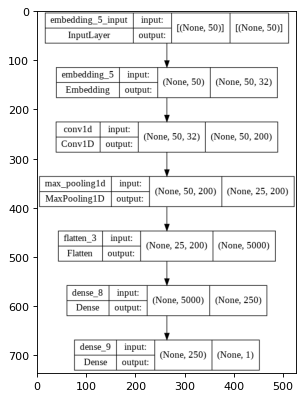

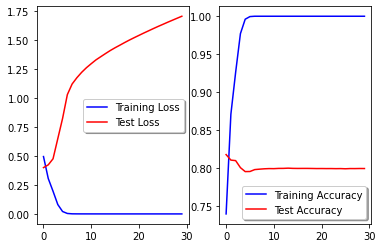

In [80]:
model_fitter(cnn_model, X_train, y_train, X_test, y_test, epochs = 30)

Observation:

***For the first model with a simple embedding layer, the test loss shows a steady increase. However, the test as well as train accuracy remains consistent for the 30 epochs. This suggests some processing layer to be added, for example cnn or rnn, we will be trying both.***

***For the cnn model in which a cnn layer is added, training loss drops down completely around the 5th epoch or so. Test loss keeps increasing and eventually becomes linear growth aroun the same epoch number. Training accuracy approaches 1 around the 5th epoch but this is overfitting on the train set. On the test set accuracy stabilises at about 80% from the 5th epoch onwards. The model on an all should not be run beyond the 5th epoch for this case it seems.***

###Q5:Implement the models in 6.3 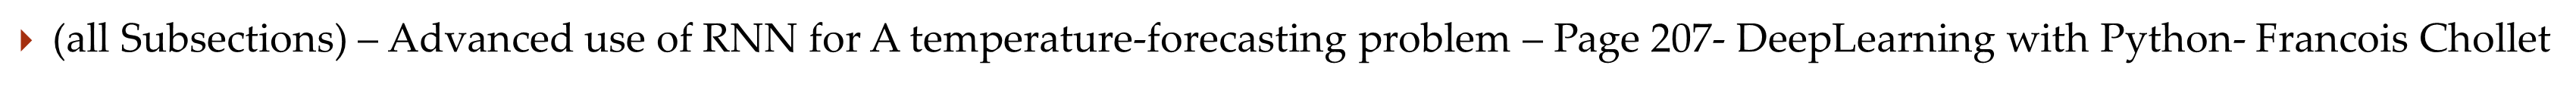

In [94]:
def lstm_model_creator():

  model = Sequential()
  model.add(Embedding(10000, 32, input_length=50))
  model.add(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2))
  model.add(Flatten())
  model.add(Dense(250, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()

  return model

def stacked_lstm_model_creator():

  model = Sequential()
  model.add(Embedding(10000, 32, input_length=50))
  model.add(LSTM(units = 100, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
  model.add(LSTM(units = 100, dropout=0.2, recurrent_dropout=0.2))
  model.add(Flatten())
  model.add(Dense(250, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()

  return model

def bidirectional_lstm_model_creator():

  model = Sequential()
  model.add(Embedding(10000, 32, input_length=50))
  model.add(Bidirectional(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2)))
  model.add(Flatten())
  model.add(Dense(250, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()

  return model

def gru_model_creator():

  model = Sequential()
  model.add(Embedding(10000, 32, input_length=50))
  model.add(GRU(units=100))
  model.add(Flatten())
  model.add(Dense(250, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()

  return model

LSTM model

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 50, 32)            320000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 flatten_5 (Flatten)         (None, 100)               0         
                                                                 
 dense_12 (Dense)            (None, 250)               25250     
                                                                 
 dense_13 (Dense)            (None, 1)                 251       
                                                                 
Total params: 398,701
Trainable params: 398,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
196/196 - 43s - loss: 0.4970 - accurac

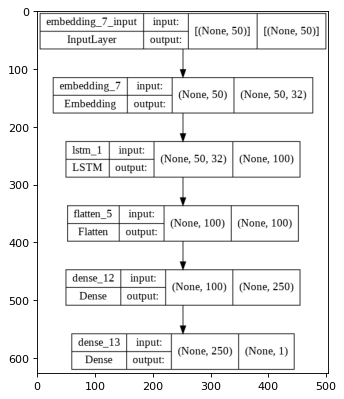

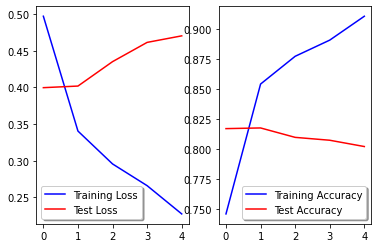

In [85]:
lstm_model = lstm_model_creator()
model_fitter(lstm_model, X_train, y_train, X_test, y_test, epochs = 5)

STACKED LSTM MODEL

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 50, 32)            320000    
                                                                 
 lstm_7 (LSTM)               (None, 50, 100)           53200     
                                                                 
 lstm_8 (LSTM)               (None, 100)               80400     
                                                                 
 flatten_8 (Flatten)         (None, 100)               0         
                                                                 
 dense_18 (Dense)            (None, 250)               25250     
                                                                 
 dense_19 (Dense)            (None, 1)                 251       
                                                                 
Total params: 479,101
Trainable params: 479,101
Non-t

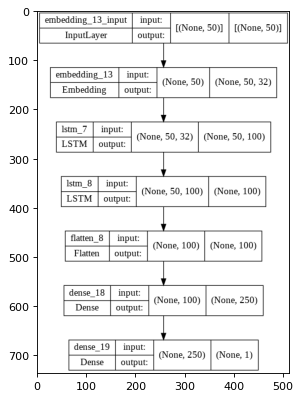

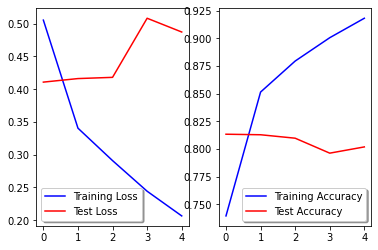

In [95]:
stacked_lstm_model = stacked_lstm_model_creator()
model_fitter(stacked_lstm_model, X_train, y_train, X_test, y_test, epochs = 5)

BIDIRECTIONAL LSTM MODEL

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 50, 32)            320000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              106400    
 l)                                                              
                                                                 
 flatten_6 (Flatten)         (None, 200)               0         
                                                                 
 dense_14 (Dense)            (None, 250)               50250     
                                                                 
 dense_15 (Dense)            (None, 1)                 251       
                                                                 
Total params: 476,901
Trainable params: 476,901
Non-trainable params: 0
________________________________________________

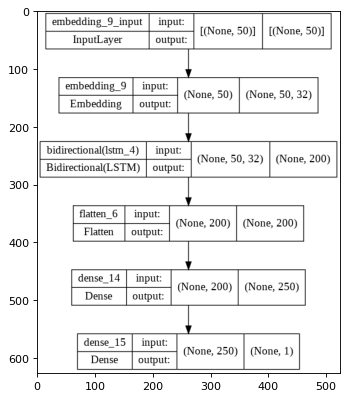

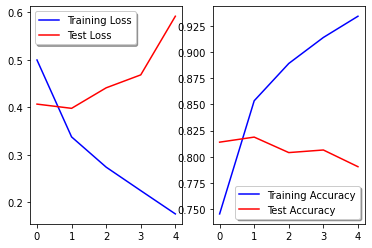

In [87]:
bidirectional_lstm_model = bidirectional_lstm_model_creator()
model_fitter(bidirectional_lstm_model, X_train, y_train, X_test, y_test, epochs = 5)

GRU MODEL

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 50, 32)            320000    
                                                                 
 gru (GRU)                   (None, 100)               40200     
                                                                 
 flatten_7 (Flatten)         (None, 100)               0         
                                                                 
 dense_16 (Dense)            (None, 250)               25250     
                                                                 
 dense_17 (Dense)            (None, 1)                 251       
                                                                 
Total params: 385,701
Trainable params: 385,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
196/196 - 28s - loss: 0.5188 - accura

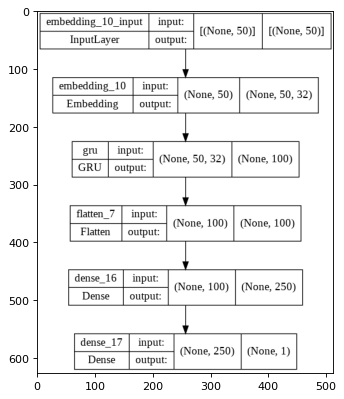

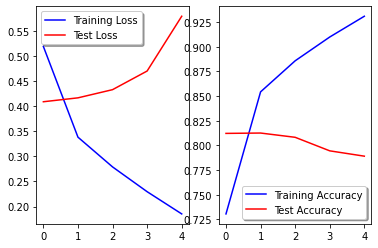

In [89]:
gru_model = gru_model_creator()
model_fitter(gru_model, X_train, y_train, X_test, y_test, epochs = 5)

Final Observation:

*** All models trained for 5 epochs for time considerations ***

***LSTM: For the lstm model in which a lstm layer is added, training loss drops down from .50 to 0.25 around the 5th epoch. Test loss keeps increasing steadily from 0.40 to 0.45. Training accuracy approaches 1 beyond the 5th epoch but this is overfitting on the train set. On the test set accuracy stabilises at about 80% from 82.5% by the 5th epoch. The model on an all should be run beyond the 5th epoch for this case it seems.***

***STACKED LSTM: For the stacked lstm model in which a second lstm layer is added after the first one. The first lstm layer now has set return_sequences as true. With some variations, the results seem to be same like LSTM model and further epochs might result in higher differentiation.***

***BIDIRECTIONAL LSTM: Again for the bidirection lstm, it seems that though variations and their paths are different, the results at least for the sake of the 5 epochs seem to result in pretty much the same.***

***GRU: Same as above.***

*** These models should preferably be run for higher number of epochs ***